In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

1) Crei un dataframe Pandas contenente le informazioni presenti nella collection


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/wtitze/4E/main/ristoranti.csv')
df

,N,address,borough,cuisine,grades,name,restaurant_id
0,0,"{'building': '8825', 'coord': [-73.8803827, 40...",Queens,American,"[{'date': datetime.datetime(2014, 11, 15, 0, 0...",Brunos On The Boulevard,40356151
1,1,"{'building': '156-71', 'coord': [-73.840437, 4...",Queens,Pizza/Italian,"[{'date': datetime.datetime(2014, 10, 29, 0, 0...",New Park Pizzeria & Restaurant,40364744
2,2,"{'building': '6409', 'coord': [-74.00528899999...",Brooklyn,American,"[{'date': datetime.datetime(2014, 7, 18, 0, 0)...",Regina Caterers,40356649
3,3,"{'building': '2491', 'coord': [-74.1459332, 40...",Staten Island,Delicatessen,"[{'date': datetime.datetime(2015, 1, 9, 0, 0),...",Bagels N Buns,40363427
4,4,"{'building': '56', 'coord': [-74.004758, 40.74...",Manhattan,American,"[{'date': datetime.datetime(2014, 6, 10, 0, 0)...",Old Homestead,40364715
...,...,...,...,...,...,...,...
25354,25354,"{'building': 'ONE', 'coord': [-81.664363600000...",Queens,Other,[],Camden Food Express,50018316
25355,25355,"{'building': '700', 'coord': [-73.988230600000...",Manhattan,Other,[],Wooly'S Nyc,50018495
25356,25356,"{'building': '2144', 'coord': [-73.9552561, 40...",Manhattan,Other,[],Rafi 786,50018553
25357,25357,"{'building': '1448', 'coord': [-73.93032629999...",Brooklyn,Other,[],NaN,50018721


2. Elimini tutte le colonne ad esclusione di ‘borough’, ‘cuisine’ e ‘name’

In [ ]:
df = df.filter(["borough","cuisine","name"])
df


,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


3.Conti il numero di ristoranti che hanno ‘Missing’ come quartiere

In [ ]:
df[df['borough']== "Missing"].count()##metodo 1 (e unico)
#df['nome_area'].str.contains(user_input) metodo2


borough    51
cuisine    51
name       51
dtype: int64

4.Sostituisca alla parola ‘Missing’ il valore null

In [ ]:
df["borough"].replace("Missing",np.nan,inplace = True)
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


5.Elimini dal dataframe tutti i ristoranti di cui non si conosce il quartiere

In [ ]:
df.drop(df[(df["borough"].isnull())].index,inplace = True)
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


6. Calcoli il numero di ristoranti per ogni cucina. Ordinare in ordine decrescente a partire dal tipo di cucina che ha più ristoranti


In [ ]:
df.groupby("cuisine")["name"].count().sort_values(ascending = False)

cuisine
American           6173
Chinese            2412
Café/Coffee/Tea    1210
Pizza              1162
Italian            1069
                   ... 
Iranian               2
Chilean               1
Californian           1
Polynesian            1
Creole/Cajun          1
Name: name, Length: 85, dtype: int64

7.Visualizzi il tipo di cucina con più ristoranti

In [ ]:
df2 = df.groupby("cuisine")["name"].count()
df2[df2 == df2.max()]
##con più ristoranti

cuisine
American    6173
Name: name, dtype: int64

8. Visualizzi un grafico a barre con i primi 10 tipi di cucina

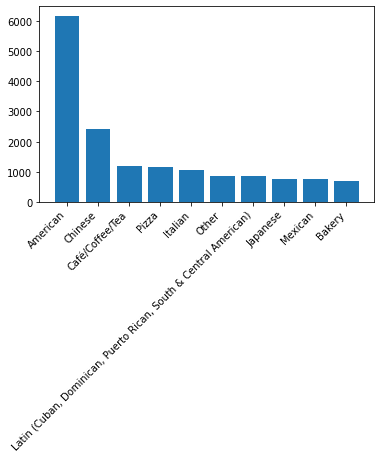

In [ ]:


data = df.groupby("cuisine")["name"].count().sort_values(ascending = False).head(10)
names = list(data.index)
fig = plt.figure()
ax = plt.axes()
ax.bar(names,data)
fig.autofmt_xdate(rotation=45)
plt.show()

9) Calcoli il numero di ristoranti per ogni quartiere

In [ ]:
df3 = df.groupby("borough",as_index = False)["name"].count()
df3

,borough,name
0,Bronx,2322
1,Brooklyn,6046
2,Manhattan,10211
3,Queens,5615
4,Staten Island,963


10) Visualizzi i dati precedenti in un grafico a torta

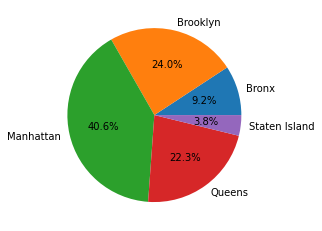

In [ ]:
df.groupby("borough")["name"].count()
fig = plt.figure()
ax = plt.axes()
ax.pie(df3['name'].values, labels=df3['borough'],autopct = "%1.1f%%")
plt.show()

11. Visualizzi i due grafici affiancati. Dare titoli appropriati ad entrambi i grafici. 


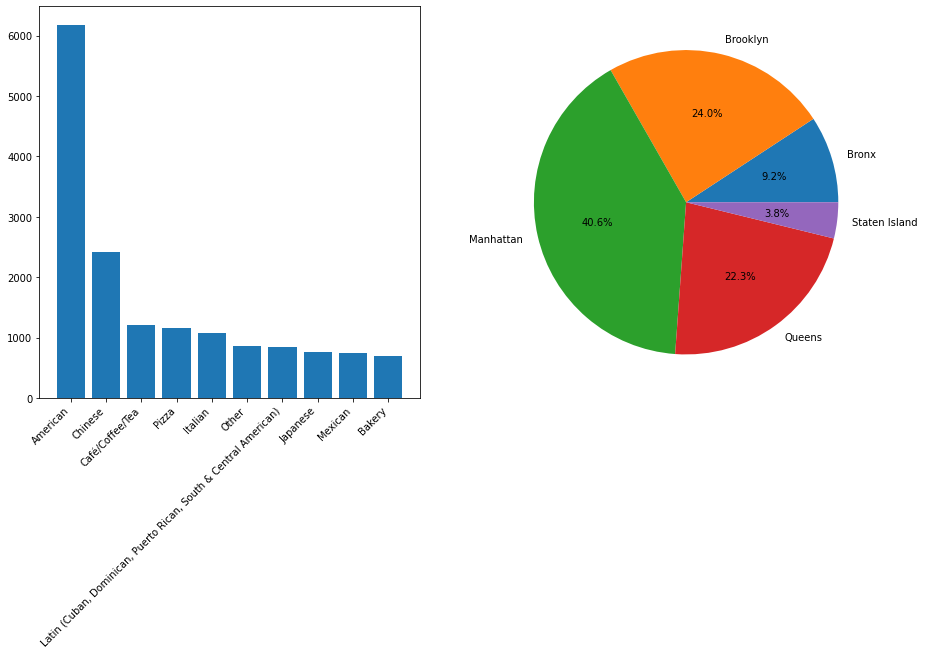

In [ ]:
fig, (ax,ax2) = plt.subplots(1,2)    # 2 grafici affiancati
fig.set_size_inches(15,8)
ax.bar(names,data)
ax2.pie(df3['name'].values, labels=df3['borough'],autopct = "%1.1f%%")
fig.autofmt_xdate(rotation=45)
plt.show()

12 Crei un nuovo dataframe sostituendo la parola 'non American' a tutti i tipi di cucina che non sono americani

In [ ]:
df = df.replace(df[df['cuisine']!='American']['cuisine'].tolist(),"non American")
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,non American,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,non American,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,non American,Camden Food Express
25355,Manhattan,non American,Wooly'S Nyc
25356,Manhattan,non American,Rafi 786
25357,Brooklyn,non American,NaN


13 Visualizzi, per ogni quartiere, il numero di ristoranti di cucina americana e non americana. Il risultato deve essere il seguente:


In [ ]:
df5 = df.groupby(["borough","cuisine"]).count()
df5
 

name
borough       cuisine           
Bronx         American       411
              non American  1911
Brooklyn      American      1273
              non American  4773
Manhattan     American      3205
              non American  7006
Missing       American        10
              non American    41
Queens        American      1040
              non American  4575
Staten Island American       244
              non American   719

14. crei un nuovo dataframe che abbia una colonna che contiene i ristoranti di cucina americana e una colonna che contiene il numero di ristoranti che propongono cucine non americane. Il risultato deve essere il seguente:

15. resetti l'indice in modo da avere le tre colonne necessarie per costruire un grafico a barre. Il risultato
deve essere il seguente: